In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numba import njit





G=6.674*10e-11
N=3

ν=3.156*10**15
t=np.linspace(0,10000*ν,10000000)

pos0=np.random.rand(N,3)*10e15
vel0=np.random.rand(N,3)*5*100
mass=np.random.rand(N)*50*10**25

state0 = np.hstack((pos0.flatten(), vel0.flatten()))

@njit
def acc(state,t):
            pos=state[:3*N].reshape(N,3)
            vel=state[3*N:].reshape(N,3)
            acc = np.zeros((N, 3))

            for i in range (N):
                for j in range (N):
                    if i!=j:
                        rji=pos[j]-pos[i]
                        θ=np.linalg.norm(rji)
                        γ=((G*(mass[i])*(mass[j]))/(θ**3))
                        φ=γ*rji
                        α=φ/mass[i]
                        acc[i]+=α
            return np.hstack((vel.flatten(),acc.flatten()))
                         

sol=odeint(acc,state0,t)

C:\Users\supar\AppData\Local\Temp\ipykernel_12248\4214479073.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\supar\miniconda3\envs\nbody_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


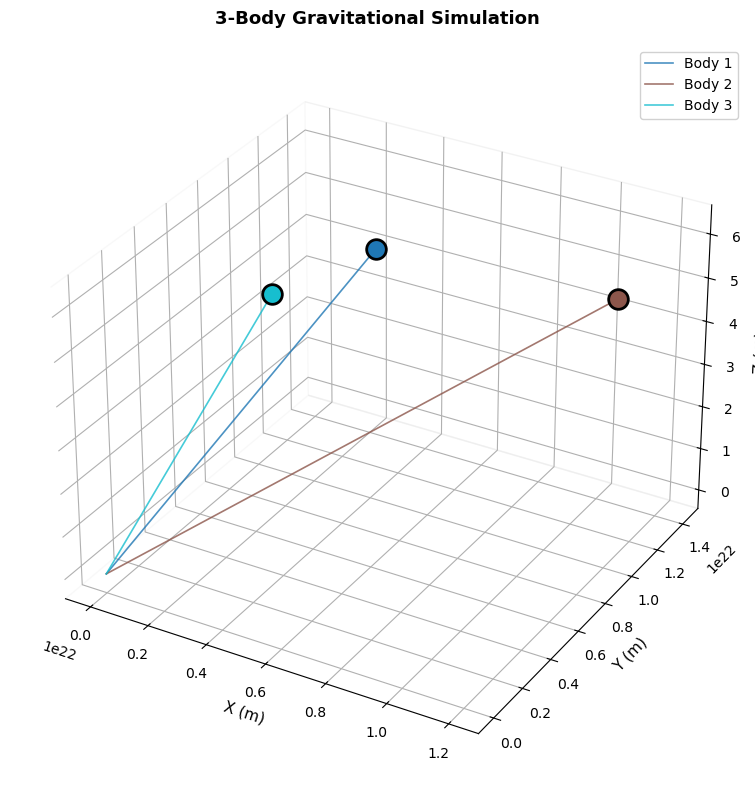

In [2]:
#Claude's part 



# Extract positions correctly
positions = sol[:, :3*N].reshape(-1, N, 3)

# Create clean plot
fig = plt.figure(figsize=(10, 8), facecolor='white')
ax = fig.add_subplot(111, projection="3d")
ax.set_facecolor('white')

# Generate colors for any N bodies
colors = plt.cm.tab10(np.linspace(0, 1, N))

# Plot trajectories as lines only
for i in range(N):
    # Line trajectory
    ax.plot(positions[:, i, 0], positions[:, i, 1], positions[:, i, 2],
           color=colors[i], linewidth=1.2, alpha=0.8, label=f'Body {i+1}')
    
    # Mark final position only
    ax.scatter(positions[-1, i, 0], positions[-1, i, 1], positions[-1, i, 2],
              color=colors[i], s=200, marker='o', edgecolors='black', 
              linewidths=2, zorder=10)

# Clean styling
ax.set_xlabel('X (m)', fontsize=11)
ax.set_ylabel('Y (m)', fontsize=11)
ax.set_zlabel('Z (m)', fontsize=11)
ax.set_title(f'{N}-Body Gravitational Simulation', fontsize=13, fontweight='bold', pad=15)

# Scientific notation
ax.ticklabel_format(style='scientific', scilimits=(0,0))

# Clean grid
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.legend(fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()